---

---

## Exemplos de modelos com a API Functional

Este notebook mostra exemplos de modelos de aprendizado profundo mais sofisticados usando a [API funcional](https://keras.io/guides/functional_api/) do Keras.


---



---

## Rede Neural Convolucional

O modelo recebe imagens 64 × 64 em preto e branco como entrada, em seguida, tem uma sequência de duas camadas convolucionais e agrupadas como extratores de recursos, seguido por uma camada totalmente conectada para interpretar os recursos e uma camada de saída com uma ativação sigmóide para previsões de duas classes .

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                27050 

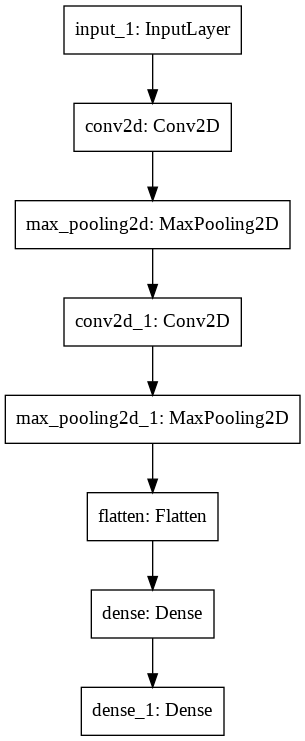

In [1]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model, to_file='cnn_graph.png')

## Rede Neural Recorrente

O modelo recebe 100 etapas de tempo de um recurso como entrada. O modelo tem uma única camada oculta LSTM para extrair recursos da sequência, seguida por uma camada totalmente conectada para interpretar a saída LSTM, seguida por uma camada de saída para fazer previsões binárias.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


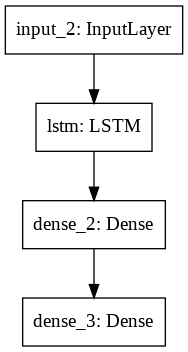

In [2]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model, to_file='RNN.png')

## Modelo com camada de entrada compartilhada

O modelo recebe imagens em preto e branco com o tamanho de 64 × 64 pixels. Existem dois submodelos de extração de recursos da CNN que compartilham essa entrada; o primeiro tem um tamanho de kernel de 4 e o segundo um tamanho de kernel de 8. As saídas desses submodelos de extração de recursos são achatadas em vetores e concatenadas em um vetor longo e passadas para uma camada totalmente conectada para interpretação antes que uma camada de saída final faça uma classificação binária.

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 61, 61, 32)   544         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 57, 57, 16)   1040        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

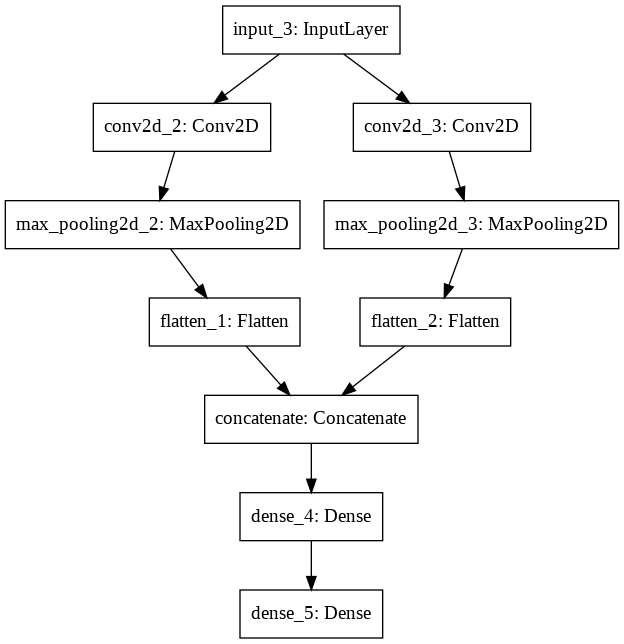

In [3]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# camada de entrada
visible = Input(shape=(64,64,1))
# primeira camada de extração de atributos
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# segunda camada de extração de atributos
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge as extrações de atributos
merge = concatenate([flat1, flat2])
# camada de interpretação
hidden1 = Dense(10, activation='relu')(merge)
# camada de predição
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model, to_file='entrada_compartilhada.png')

## Modelo com camada de extração de atributos compartilhada

A entrada para o modelo é 100 etapas de tempo de 1 recurso. Uma camada LSTM com 10 células de memória interpreta essa sequência. O primeiro modelo de interpretação é uma única camada superficial totalmente conectada, o segundo é um modelo profundo de 3 camadas. A saída de ambos os modelos de interpretação é concatenada em um vetor longo que é passado para a camada de saída usada para fazer uma previsão binária.

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           480         input_4[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 10)           110         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 20)           220         dense_7[0][0]                    
____________________________________________________________________________________________

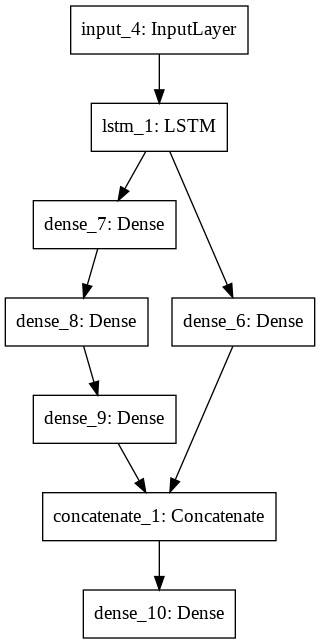

In [4]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
# entradas
visible = Input(shape=(100,1))
# extração de atributos
extract1 = LSTM(10)(visible)
# primeiro modelo de interpretação
interp1 = Dense(10, activation='relu')(extract1)
# segundo modelo de interpretação
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)
# combina (merge) as interpretações
merge = concatenate([interp1, interp13])
# saída
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model, to_file='extração_compartilhada.png')

## Modelo de entrada múltipla

Recebe duas versões da imagem como entrada, cada uma com um tamanho diferente. Especificamente, uma versão em preto e branco de 64 × 64 e uma versão em cores de 32 × 32. Os modelos CNN de extração de recursos separados operam em cada uma, então os resultados de ambos os modelos são concatenados para interpretação e previsão final.

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# primeiro padrão de entrada
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
# segundo padrão de entrada
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
# merge as entradas
merge = concatenate([flat1, flat2])
# interpretação
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)
print(model.summary())
plot_model(model, to_file='entrada_multipla.png')

## Modelo de múltiplas saídas

Faz dois tipos diferentes de previsões. Dada uma sequência de entrada de 100 etapas de tempo de um recurso, o modelo classificará a sequência e produzirá uma nova sequência com o mesmo comprimento.

Uma camada LSTM interpreta a sequência de entrada e retorna o estado oculto para cada etapa de tempo. O primeiro modelo de saída cria um LSTM empilhado, interpreta os recursos e faz uma previsão binária. O segundo modelo de saída usa a mesma camada de saída para fazer uma previsão com valor real para cada etapa de tempo de entrada.

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 100, 10)      480         input_5[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 10)           840         lstm_2[0][0]                     
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 10)           110         lstm_3[0][0]                     
____________________________________________________________________________________________

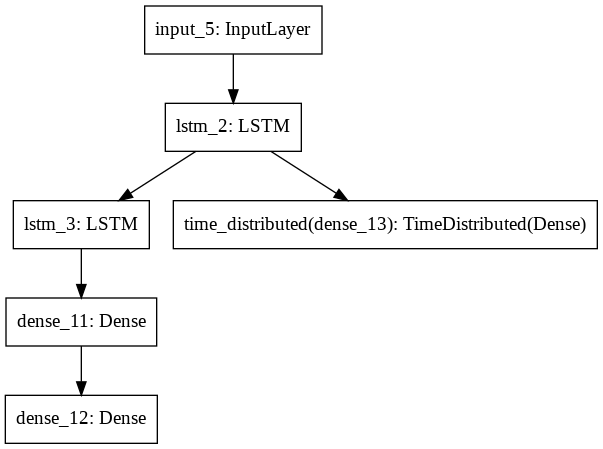

In [5]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
# camada de entrada
visible = Input(shape=(100,1))
# extração de atributos
extract = LSTM(10, return_sequences=True)(visible)
# saída classificação
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)
# saída sequência
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)
# saída
model = Model(inputs=visible, outputs=[output1, output2])
print(model.summary())
plot_model(model, to_file='multiple_outputs.png')

Fonte: Jason Brownlee. *Deep Learning With Python*. Edition: v1.7